In [22]:
import torch
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/train.csv')

In [5]:
df['author'].unique()

array(['EAP', 'HPL', 'MWS'], dtype=object)

In [6]:
authors = ["Edgar Allan Poe",  "HP Lovecraft", "Mary Shelley"]

In [8]:
author_code = dict(zip(df['author'].unique(), authors))

In [33]:
[len(df[df['author'] == a]) for a in author_code]

[7900, 5635, 6044]

<BarContainer object of 3 artists>

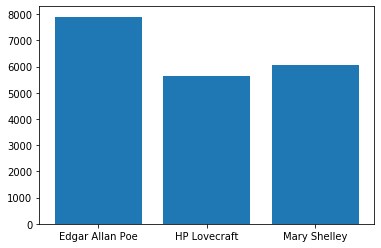

In [37]:
plt.bar(author_code.values(), [len(df[df['author'] == a]) for a in author_code])

## Procedure

- train/valid split
- text_preprocessing
- data_loader
- network
   - train (loss = nll_loss)
   - eval (criterion = accuracy)


In [38]:
text = list(df['text'])

In [47]:
def preprocess(s):
    return ''.join(e for e in s.lower() if (e.isalnum() or e.isspace()))

In [50]:
pre_processed = list(map(preprocess, text))

In [52]:
pre_processed[0]

'this process however afforded me no means of ascertaining the dimensions of my dungeon as i might make its circuit and return to the point whence i set out without being aware of the fact so perfectly uniform seemed the wall'

In [54]:
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab

In [55]:
tokenizer = get_tokenizer('basic_english')
counter = Counter()
for line in pre_processed:
    counter.update(tokenizer(line))
vocab = Vocab(counter, min_freq=1)

In [67]:
[vocab[token] for token in ['here', 'is', 'an', '']]

[128, 26, 35, 2916]